## Census Dataset for Group Assignment 2

This dataset is racial data for all census tracts within the City of Oakland. The data here was gathered in the 2019 ACS and downloaded from the censusreporter [website](https://censusreporter.org/data/table/?table=B02001&geo_ids=16000US0653000,140|16000US0653000&primary_geo_id=16000US0653000). 

## Import libraries and data

In [2]:
#First I need to import the relevant libraries

#Starting with pandas to analyze the data 
import pandas as pd

#Then geopandas because we're mappers
import geopandas as gpd

#Then we want basemaps  
import contextily as ctx

#And plotting power 
import matplotlib.pyplot as plt

In [25]:
#Then we need to upload our data file 
rdf = gpd.read_file('data/acs2019_5yr_B03002_14000US06001405301.geojson')

## Take a look at the data

In [26]:
#Check the size
rdf.shape

(115, 45)

In [27]:
#see what the columns look like
rdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,208.0,3002.0,191.0,2317.0,235.0,107.0,68.0,...,12.0,34.0,33.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,120.0,1833.0,132.0,1475.0,145.0,52.0,48.0,...,12.0,17.0,16.0,55.0,42.0,14.0,25.0,41.0,36.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,309.0,4700.0,319.0,3434.0,366.0,459.0,179.0,...,17.0,37.0,60.0,0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,344.0,3522.0,325.0,2554.0,267.0,266.0,168.0,...,12.0,199.0,212.0,58.0,52.0,13.0,21.0,45.0,47.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,357.0,3734.0,356.0,1874.0,236.0,882.0,202.0,...,12.0,104.0,84.0,124.0,84.0,19.0,22.0,105.0,81.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


In [31]:
#Can't see all the columns so, lets show them all 
pd.set_option('display.max_columns', None)

In [34]:
rdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
40,14000US06001404300,"Census Tract 4043, Alameda, CA",3443.0,216.0,3030.0,239.0,2248.0,230.0,57.0,69.0,0.0,12.0,467.0,113.0,0.0,12.0,16.0,24.0,242.0,140.0,42.0,48.0,200.0,107.0,413.0,196.0,67.0,48.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,160.0,136.0,186.0,113.0,93.0,82.0,93.0,109.0,"MULTIPOLYGON (((-122.25081 37.83714, -122.2505..."


<AxesSubplot:>

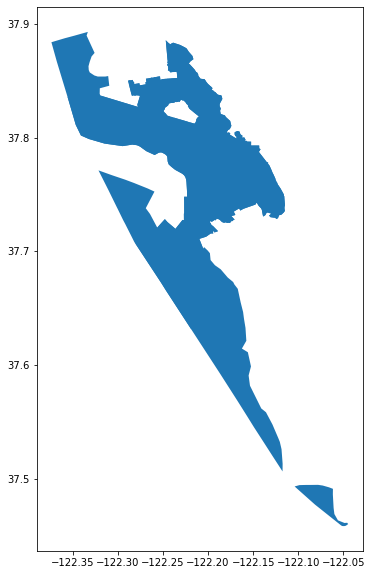

In [35]:
#what does this look like
rdf.plot(figsize=(10,10))

In [36]:
#Ok, cool that kinda looks like Oakland City limits.
#Now let's take a look at the dataset in more detail
rdf.info

<bound method DataFrame.info of                   geoid                            name  B03002001  \
0    14000US06001400100  Census Tract 4001, Alameda, CA     3120.0   
1    14000US06001400200  Census Tract 4002, Alameda, CA     2007.0   
2    14000US06001400300  Census Tract 4003, Alameda, CA     5051.0   
3    14000US06001400400  Census Tract 4004, Alameda, CA     4007.0   
4    14000US06001400500  Census Tract 4005, Alameda, CA     4124.0   
..                  ...                             ...        ...   
110  14000US06001981900  Census Tract 9819, Alameda, CA       58.0   
111  14000US06001982000  Census Tract 9820, Alameda, CA       63.0   
112  14000US06001983200  Census Tract 9832, Alameda, CA      583.0   
113  14000US06001990000  Census Tract 9900, Alameda, CA        0.0   
114      16000US0653000                     Oakland, CA   425097.0   

     B03002001, Error  B03002002  B03002002, Error  B03002003  \
0               208.0     3002.0             191.0     2317.0 

## Data Clean-Up

**Notes about column clean-up**

So there's a lot of columns here. For this analysis, we are going to delete the sub-categorey columns under the "Hispanic and Latino" for simplicity in visualization. By comparing numbers with those in the census resporter table, I've identified those columns as B03002013-BB03002020. Since the other racial categories are under the "Not Hispanic or Latino" caegorey this should not cause any double counting. The same tretment will be given to the sub-categories under "Two or More Races." 

Here's an image of the data in chart form from censusreporter to help illustrate the point. To. avoid confusion, we'll also get rid of the "Not Hispanic or Latino Total" column as well since it's not a true total.

<img src="data/CensusReporter_Screenshot.png" width=500>

In [63]:
#Alright, I see a lot of error columns I don't want. Let's drop those. 
columns_to_keep = ['geoid',
 'name',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [64]:
#Ok, now we have to redefine rdf to include just our keeper columns. 
rdf = rdf[columns_to_keep]

In [65]:
#Make sure that worked. 
rdf.head()

,geoid,name,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",1475.0,52.0,4.0,171.0,0.0,0.0,131.0,174.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",3434.0,459.0,0.0,590.0,23.0,97.0,97.0,351.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",2554.0,266.0,35.0,420.0,0.0,0.0,247.0,485.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",1874.0,882.0,0.0,446.0,22.0,6.0,504.0,390.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


In [83]:
#Looks good. Now I need to rename these columns to the racial group they represent. 
rdf.columns = ['geoid',
 'name',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [84]:
#Let's make sure that worked.
rdf.head()

,geoid,name,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",1475.0,52.0,4.0,171.0,0.0,0.0,131.0,174.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",3434.0,459.0,0.0,590.0,23.0,97.0,97.0,351.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",2554.0,266.0,35.0,420.0,0.0,0.0,247.0,485.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",1874.0,882.0,0.0,446.0,22.0,6.0,504.0,390.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


**Note about math checking** 
Since we don't have a true total column, I just went ahead and just manually checked the rows above to see that they matched those in the original censusreporter table. 

## Stats

In [86]:
#Lets see some quick stats
rdf['Asian alone'].describe()

count      115.000000
mean      1133.826087
std       6045.209011
min          0.000000
25%        236.500000
50%        435.000000
75%        778.000000
max      65195.000000
Name: Asian alone, dtype: float64

In [87]:
rdf['Black or African American alone'].describe()

count      115.000000
mean      1717.373913
std       9152.142565
min          0.000000
25%        355.000000
50%        711.000000
75%       1240.500000
max      98749.000000
Name: Black or African American alone, dtype: float64

<AxesSubplot:ylabel='Frequency'>

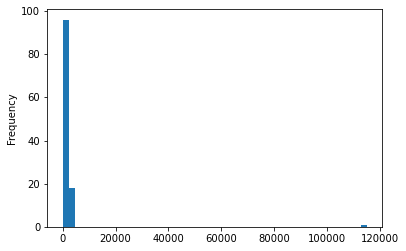

In [88]:
rdf['Hispanic or Latino'].plot.hist(bins=50)

Well that's weird, glad I plotted that. 

In [89]:
#Let me start with the end becuse I suspect there may be a total row. 
rdf.tail(5)

,geoid,name,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
110,14000US06001981900,"Census Tract 9819, Alameda, CA",50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
111,14000US06001982000,"Census Tract 9820, Alameda, CA",10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
112,14000US06001983200,"Census Tract 9832, Alameda, CA",308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
113,14000US06001990000,"Census Tract 9900, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."
114,16000US0653000,"Oakland, CA",120225.0,98749.0,1455.0,65195.0,2237.0,1812.0,20482.0,114942.0,"MULTIPOLYGON (((-122.35588 37.83573, -122.3507..."


So I was right, there's a total column for the whole city. I'll remove it so it doesn't screw with our results. 

In [90]:
rdf = rdf.drop(114)

In [91]:
rdf.tail()

,geoid,name,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
109,14000US06001410500,"Census Tract 4105, Alameda, CA",403.0,1652.0,7.0,294.0,24.0,7.0,52.0,266.0,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935..."
110,14000US06001981900,"Census Tract 9819, Alameda, CA",50.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.34668 37.81103, -122.3441..."
111,14000US06001982000,"Census Tract 9820, Alameda, CA",10.0,23.0,2.0,20.0,0.0,0.0,0.0,8.0,"MULTIPOLYGON (((-122.31439 37.79484, -122.3135..."
112,14000US06001983200,"Census Tract 9832, Alameda, CA",308.0,53.0,9.0,138.0,3.0,5.0,20.0,47.0,"MULTIPOLYGON (((-122.28417 37.79402, -122.2838..."
113,14000US06001990000,"Census Tract 9900, Alameda, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-122.09859 37.49488, -122.0910..."


Great, looks like the total column is gone now. Let's try that chart again. 


<AxesSubplot:ylabel='Frequency'>

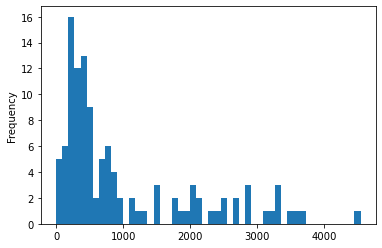

In [92]:
rdf['Hispanic or Latino'].plot.hist(bins=50)

That looks like a much more normal distrobution. 

## Sorting

In [94]:
#Let's see what census tracts have the largest white population
rdf_sorted = rdf.sort_values(by='White alone',ascending = False)

In [96]:
rdf_sorted[['geoid','White alone']].head(10)

,geoid,White alone
43,14000US06001404502,4448.0
41,14000US06001404400,3771.0
2,14000US06001400300,3434.0
44,14000US06001404600,3223.0
49,14000US06001405100,2786.0
3,14000US06001400400,2554.0
85,14000US06001408100,2531.0
39,14000US06001404200,2394.0
47,14000US06001404900,2354.0
70,14000US06001406700,2328.0


<AxesSubplot:>

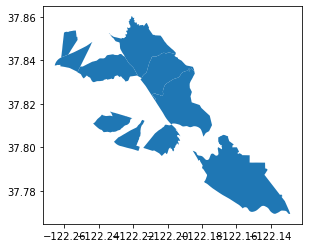

In [105]:
#Let's see what this looks like mapped
rdf_sorted.head(10).plot()

## Normalizing data
Those census tracts with the largest white populations might just be reflecting the areas with the largest population overall, so I want to normalize the data.

In [106]:
#To accomplish this, I'll create new percentgae columns for each racial group. 
#First let's get that list again for reference 
list(rdf)

['geoid',
 'name',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [108]:
#Woops, I don't have a total column.
#So I'll have to create that by adding all the racial group columns together. 
rdf['Total'] = rdf['White alone']+rdf['Black or African American alone']+rdf['American Indian and Alaska Native alone']+rdf['Asian alone']+rdf['Native Hawaiian and Other Pacific Islander alone']+rdf['Some other race alone']+rdf['Two or more races']+rdf['Hispanic or Latino']

In [109]:
#Ok, now let's look at our data to see if our new total is there and accurate. 
rdf.head()

,geoid,name,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Total
0,14000US06001400100,"Census Tract 4001, Alameda, CA",2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466...",3120.0
1,14000US06001400200,"Census Tract 4002, Alameda, CA",1475.0,52.0,4.0,171.0,0.0,0.0,131.0,174.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577...",2007.0
2,14000US06001400300,"Census Tract 4003, Alameda, CA",3434.0,459.0,0.0,590.0,23.0,97.0,97.0,351.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655...",5051.0
3,14000US06001400400,"Census Tract 4004, Alameda, CA",2554.0,266.0,35.0,420.0,0.0,0.0,247.0,485.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618...",4007.0
4,14000US06001400500,"Census Tract 4005, Alameda, CA",1874.0,882.0,0.0,446.0,22.0,6.0,504.0,390.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693...",4124.0


In [111]:
#Looks good to me. Now let's get back to normalizing. 
rdf['Percent White alone'] = rdf['White alone']/rdf['Total']*100
rdf['Percent Black or African American alone'] = rdf['Black or African American alone']/rdf['Total']*100
rdf['Percent American Indian and Alaska Native alone'] = rdf['American Indian and Alaska Native alone']/rdf['Total']*100
rdf['Percent Asian alone'] = rdf['Asian alone']/rdf['Total']*100
rdf['Percent Native Hawaiian and Other Pacific Islander alone'] = rdf['Native Hawaiian and Other Pacific Islander alone']/rdf['Total']*100
rdf['Percent Some other race alone'] = rdf['Some other race alone']/rdf['Total']*100
rdf['Percent Two or more races'] = rdf['Two or more races']/rdf['Total']*100
rdf['Percent Hispanic or Latino'] = rdf['Hispanic or Latino']/rdf['Total']*100

In [112]:
#I want to see those new columns.
rdf.head()

,geoid,name,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Total,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino
0,14000US06001400100,"Census Tract 4001, Alameda, CA",2317.0,107.0,0.0,391.0,0.0,0.0,187.0,118.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466...",3120.0,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051
1,14000US06001400200,"Census Tract 4002, Alameda, CA",1475.0,52.0,4.0,171.0,0.0,0.0,131.0,174.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577...",2007.0,73.492775,2.590932,0.199302,8.520179,0.000000,0.000000,6.527155,8.669656
2,14000US06001400300,"Census Tract 4003, Alameda, CA",3434.0,459.0,0.0,590.0,23.0,97.0,97.0,351.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655...",5051.0,67.986537,9.087309,0.000000,11.680855,0.455355,1.920412,1.920412,6.949119
3,14000US06001400400,"Census Tract 4004, Alameda, CA",2554.0,266.0,35.0,420.0,0.0,0.0,247.0,485.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618...",4007.0,63.738458,6.638383,0.873471,10.481657,0.000000,0.000000,6.164213,12.103818
4,14000US06001400500,"Census Tract 4005, Alameda, CA",1874.0,882.0,0.0,446.0,22.0,6.0,504.0,390.0,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693...",4124.0,45.441319,21.387003,0.000000,10.814743,0.533463,0.145490,12.221145,9.456838


## Maps
Now that I feel good about where the data is at, it's on to mapping.

<AxesSubplot:>

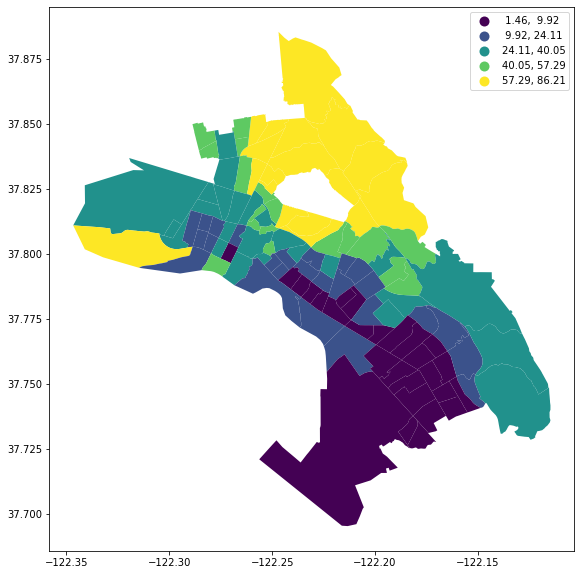

In [131]:
#I'm not super aware of the distrobution for each column, so I'll leave the intervals at natural breaks. 
rdf.plot(figsize=(12,10),
                 column='Percent White alone',
                 legend=True, 
                 scheme='NaturalBreaks')

We can already see the disparity in the white population spread across the city, with a range in population from 1.5% in one tract to %86.2 in another. 

In [120]:
#Let's look at those stats in closer detail.
rdf['Percent White alone'].describe()

count    113.000000
mean      30.724425
std       22.484680
min        1.460055
25%       11.691467
50%       28.191964
75%       49.283668
max       86.206897
Name: Percent White alone, dtype: float64

<AxesSubplot:>

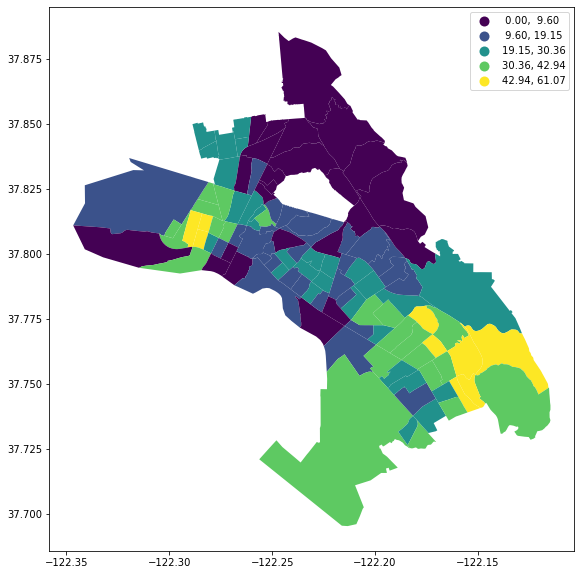

In [132]:
rdf.plot(figsize=(12,10),
                 column='Percent Black or African American alone',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

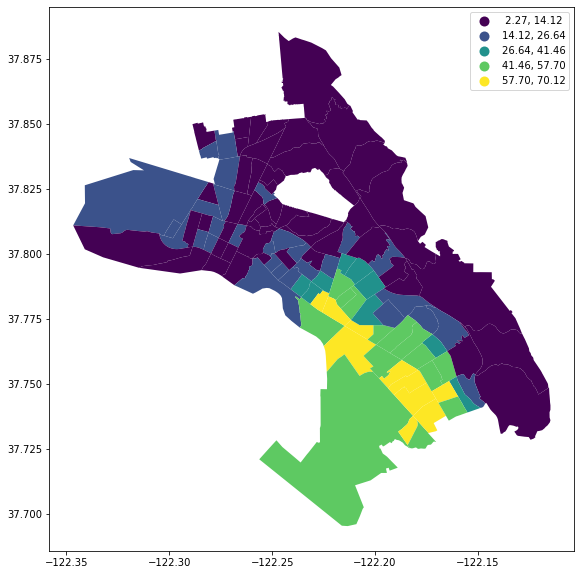

In [133]:
rdf.plot(figsize=(12,10),
                 column='Percent Hispanic or Latino',
                 legend=True, 
                 scheme='NaturalBreaks')

Text(0.5, 1.0, 'Percent Black alone')

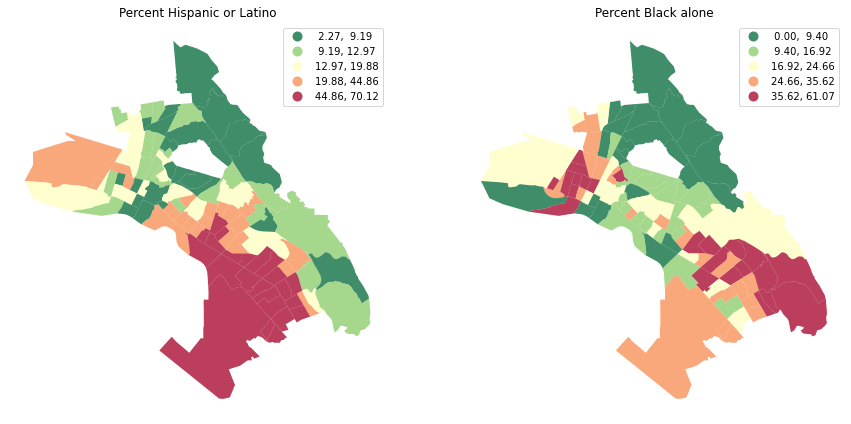

In [138]:
#At brief glance, there looked like a good amount of overlap in the Black and Latino populations.
#Let's look at them side by side. 
#create the 1x2 subplots
fig, axsBL = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axsBL

# regular count map on the left
rdf.plot(column='Percent Hispanic or Latino', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic or Latino")

# spatial lag map on the right
rdf.plot(column='Percent Black or African American alone', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Black alone")

<AxesSubplot:>

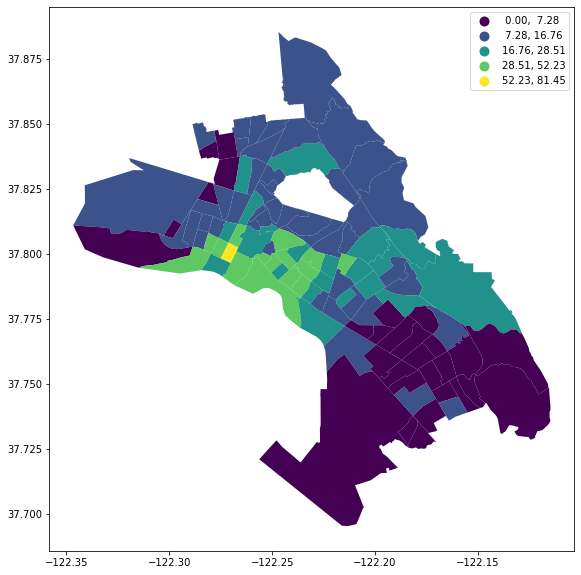

In [139]:
#Next let's see where the Asian population resides.
rdf.plot(figsize=(12,10),
                 column='Percent Asian alone',
                 legend=True, 
                 scheme='NaturalBreaks')

I would suspect that the concentration we see in the map above is around Chinatown.
I'll add a base map next to see if that's the case. 

In [140]:
# reproject to Web Mercator
rdf_web_mercator = rdf.to_crs(epsg=3857)

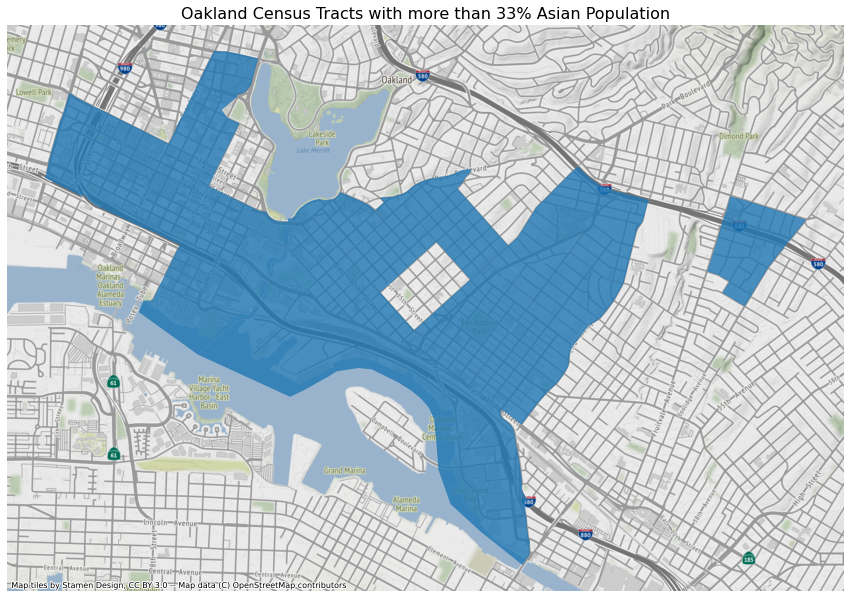

In [147]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
rdf_web_mercator[rdf_web_mercator['Percent Asian alone'] > 33].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Oakland Census Tracts with more than 33% Asian Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

Yes, it does look like the area around Oakland's Chinatown is home to the biggest concentrations of Asian populations. 

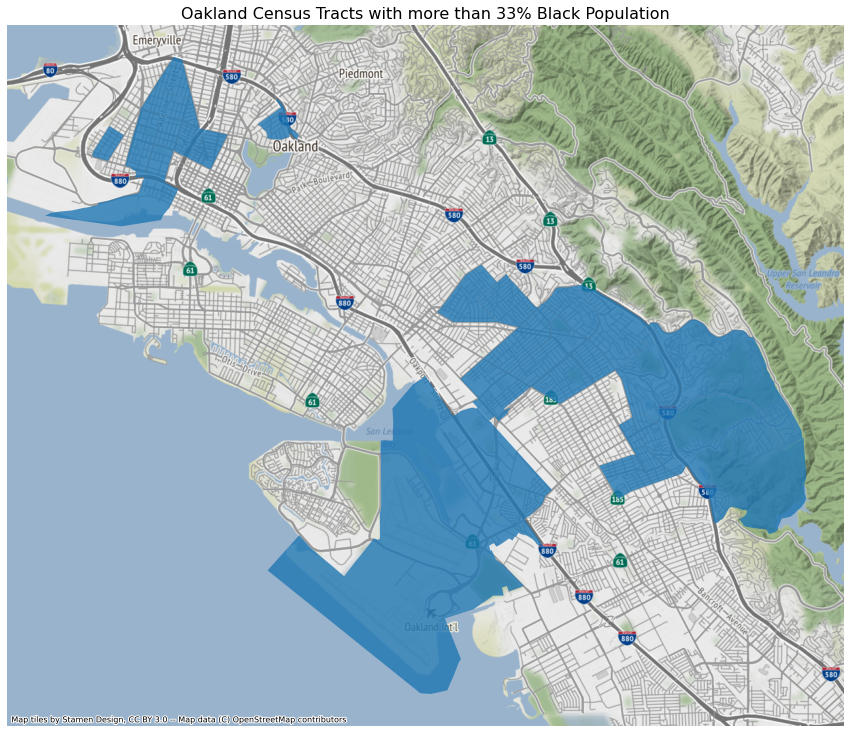

In [148]:
# Let's look at where the Black population is most concentated. 
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
rdf_web_mercator[rdf_web_mercator['Percent Black or African American alone'] > 33].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Oakland Census Tracts with more than 33% Black Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

Here we can see that the Black population is found most densely in two areas: the most south-eastern portion of the city and then in West Oakland in between the 880/580/980 freeways. 

Based on our comparison map from earlier, we can reaosnably guess that the Latino population would be found mostly in East Oakland, north and west of the black areas plotted above. 

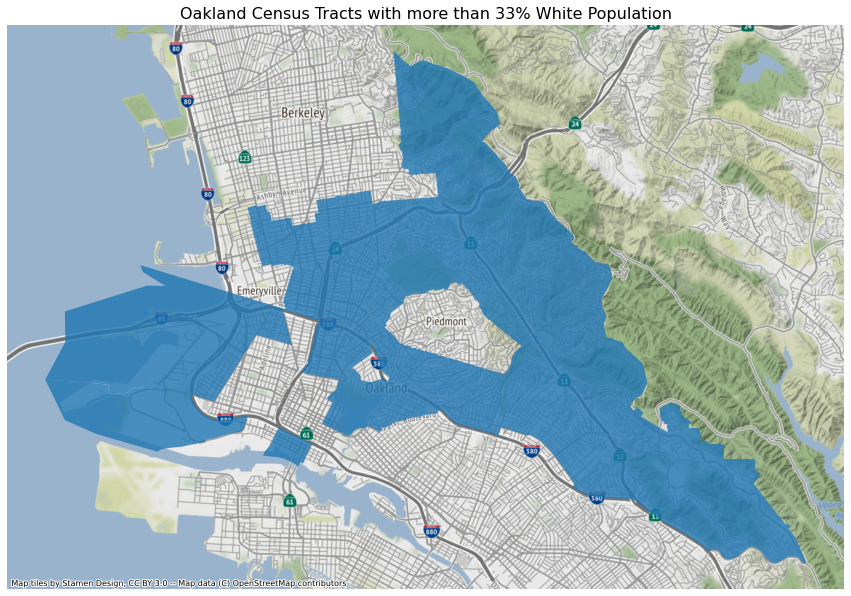

In [149]:
#Lastly, let's look at the White population. 
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
rdf_web_mercator[rdf_web_mercator['Percent White alone'] > 33].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Oakland Census Tracts with more than 33% White Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

And finally, we can see that the White population is concentrated in North Oakland and near Lake Merritt. We can also see how highway 580 acts as a dividing line in the southern part of the city. 

Also note the City of Piedmont cut out in the middle of Oakland is not included in this analysis. 